Zeichnen Sie den Constraint-Graph
Wenden Sie den AC-3-Algorithmus auf das CSP an. Geben Sie den Zustand der Queue und das Ergebnis von ARC_Reduce, d.h. den Ergebniszustand des aktuellen
D
i
, für jede Iteration des Algorithmus an.
Thema: Handsimulation des AC-3-Algorithm

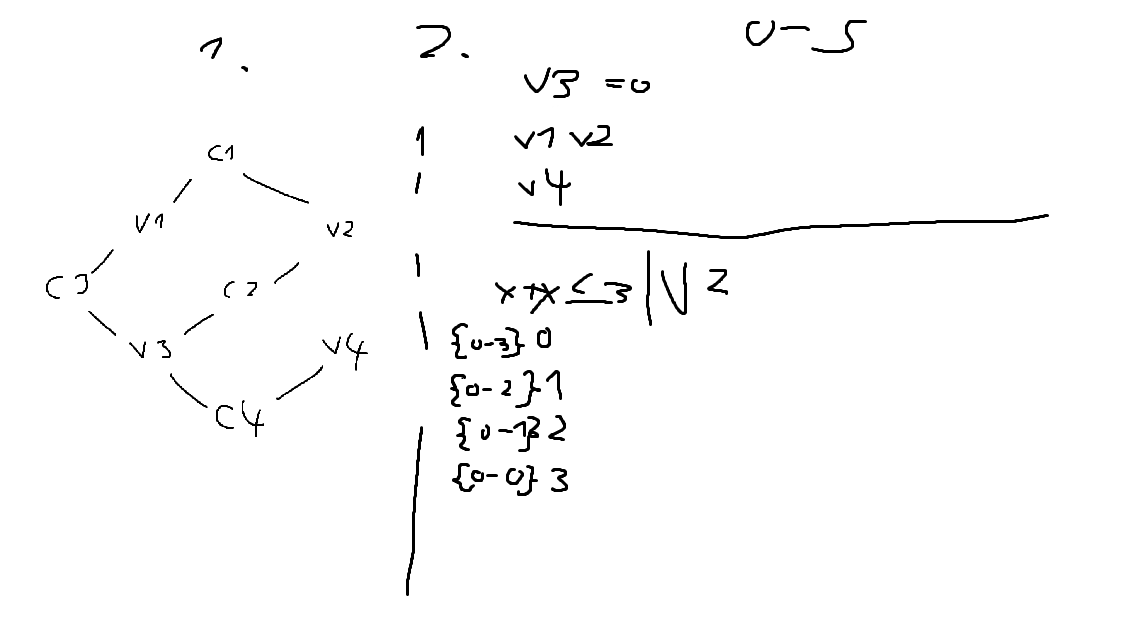


In [29]:
from enum import Enum

numrange = [0,1,2,3,4,5]

class Node:
    def __init__(self, value, name):
        self.value = value
        self.name = name

nodes = [Node(list(numrange), f"v{i+1}") for i in range(4)]



#Constrains simple
def c1():
    return nodes[0].value + nodes[1].value == 3

def c2():
    return ((nodes[1].value + nodes[2].value) <= 3)

def c3():
    return nodes[0].value < nodes[2].value

def c4():
    return nodes[2].value != nodes[3].value

def printNodes():

    print("--- Nodes: ---")
    for n in nodes:
        print(n.name,n.value,)


def constain(node1,node2,constraint):
    print(f"--- C{node1.name} :{node2.name} ---")
    tempvalues = set()
    for v in node1.value:
        # Prüfen, ob es ein w ∈ node2.value gibt, das den Constraint erfüllt
        for w in node2.value:
            if constraint(v,w):
                tempvalues.add(v) #added alle die dem constrain entsprechen

    #returnt ob sich etwas verändert hat
    changed = len(tempvalues) != len(node1.value)
    #neu zuweisen
    node1.value = list(tempvalues)
    print(f"{node1.name}.value = {node1.value}")

    return changed

#constraints
c1          = lambda x,y: x+y == 3
c1invert    = lambda x,y: y+x == 3

c2          = lambda x,y: x+y <= 3
c2invert    = lambda x,y: y+x <= 3

c3          = lambda x,y: x <= y
c3invert    = lambda x,y: y >= x

c4          = lambda x,y: x != y
c4invert    = lambda x,y: y != x
#Anwendung:
#constain(nodes[0], nodes[1], c1)
printNodes()

class N(Enum): #N = node
    V1 = "v1"
    V2 = "v2"
    V3 = "v3"
    V4 = "v4"

#start queue =
queue = [
    (N.V1, N.V2),
    (N.V2, N.V1),
    (N.V2, N.V3),
    (N.V3, N.V2),
    (N.V1, N.V3),
    (N.V3, N.V1),
    (N.V3, N.V4),
    (N.V4, N.V3)
]

#queue.pop(0) → entfernt erstes Element und gibt es zurück
#append hhinzufügen

def printqueue():
    print("--- Queue: ---")
    for n in queue:
        print(f"{n.__str__()}")

printqueue()




--- Nodes: ---
v1 [0, 1, 2, 3, 4, 5]
v2 [0, 1, 2, 3, 4, 5]
v3 [0, 1, 2, 3, 4, 5]
v4 [0, 1, 2, 3, 4, 5]
--- Queue: ---
(<N.V1: 'v1'>, <N.V2: 'v2'>)
(<N.V2: 'v2'>, <N.V1: 'v1'>)
(<N.V2: 'v2'>, <N.V3: 'v3'>)
(<N.V3: 'v3'>, <N.V2: 'v2'>)
(<N.V1: 'v1'>, <N.V3: 'v3'>)
(<N.V3: 'v3'>, <N.V1: 'v1'>)
(<N.V3: 'v3'>, <N.V4: 'v4'>)
(<N.V4: 'v4'>, <N.V3: 'v3'>)


Jetzt wo das alles erstellt ist, ist das simulieren ziemlich einfach:

In [30]:
printNodes()

--- Nodes: ---
v1 [0, 1, 2, 3, 4, 5]
v2 [0, 1, 2, 3, 4, 5]
v3 [0, 1, 2, 3, 4, 5]
v4 [0, 1, 2, 3, 4, 5]


unser start

In [31]:
queue.pop(0)

(<N.V1: 'v1'>, <N.V2: 'v2'>)

also v1,v2, die sind in constrain: c1 verknüpft
# c1: v1 + v2 = 3
# c2: v2 + v3 <= 3
# c3: v1 <= v3
# c4: v3 != v4

In [32]:
constain(nodes[0],nodes[1],c1)

--- Cv1 :v2 ---
v1.value = [0, 1, 2, 3]


True

Wir haben True zurück bekommen, heißt es hat sich etwas verändert, demnach müssen wir die nachbarn von v1, noch einmal hinein packen, (mit schlauem blick auf den graphen... ist das v3v1

In [33]:
queue.append((N.V3,N.V1))
printqueue()
printNodes()

--- Queue: ---
(<N.V2: 'v2'>, <N.V1: 'v1'>)
(<N.V2: 'v2'>, <N.V3: 'v3'>)
(<N.V3: 'v3'>, <N.V2: 'v2'>)
(<N.V1: 'v1'>, <N.V3: 'v3'>)
(<N.V3: 'v3'>, <N.V1: 'v1'>)
(<N.V3: 'v3'>, <N.V4: 'v4'>)
(<N.V4: 'v4'>, <N.V3: 'v3'>)
(<N.V3: 'v3'>, <N.V1: 'v1'>)
--- Nodes: ---
v1 [0, 1, 2, 3]
v2 [0, 1, 2, 3, 4, 5]
v3 [0, 1, 2, 3, 4, 5]
v4 [0, 1, 2, 3, 4, 5]


weiter gehts

In [34]:
queue.pop(0)

(<N.V2: 'v2'>, <N.V1: 'v1'>)

das ist jetzt in anderer reihenfolgee wie der constrain daher:

In [35]:
constain(nodes[1],nodes[2],c1invert)

--- Cv2 :v3 ---
v2.value = [0, 1, 2, 3]


True

wieder eine veränderung also für 2, die 3 erneut hinten anhängen

In [36]:
queue.append((N.V3,N.V2))
printqueue()
printNodes()

--- Queue: ---
(<N.V2: 'v2'>, <N.V3: 'v3'>)
(<N.V3: 'v3'>, <N.V2: 'v2'>)
(<N.V1: 'v1'>, <N.V3: 'v3'>)
(<N.V3: 'v3'>, <N.V1: 'v1'>)
(<N.V3: 'v3'>, <N.V4: 'v4'>)
(<N.V4: 'v4'>, <N.V3: 'v3'>)
(<N.V3: 'v3'>, <N.V1: 'v1'>)
(<N.V3: 'v3'>, <N.V2: 'v2'>)
--- Nodes: ---
v1 [0, 1, 2, 3]
v2 [0, 1, 2, 3]
v3 [0, 1, 2, 3, 4, 5]
v4 [0, 1, 2, 3, 4, 5]


In [37]:
queue.pop(0)

(<N.V2: 'v2'>, <N.V3: 'v3'>)

In [38]:
constain(nodes[1],nodes[2],c2)
printNodes()

--- Cv2 :v3 ---
v2.value = [0, 1, 2, 3]
--- Nodes: ---
v1 [0, 1, 2, 3]
v2 [0, 1, 2, 3]
v3 [0, 1, 2, 3, 4, 5]
v4 [0, 1, 2, 3, 4, 5]


In [39]:
queue.pop(0)

(<N.V3: 'v3'>, <N.V2: 'v2'>)

In [40]:
constain(nodes[2],nodes[1],c2invert)
printNodes()

--- Cv3 :v2 ---
v3.value = [0, 1, 2, 3]
--- Nodes: ---
v1 [0, 1, 2, 3]
v2 [0, 1, 2, 3]
v3 [0, 1, 2, 3]
v4 [0, 1, 2, 3, 4, 5]


In [41]:
queue.pop(0)

(<N.V1: 'v1'>, <N.V3: 'v3'>)

In [42]:
constain(nodes[0],nodes[2],c3)
printNodes()

--- Cv1 :v3 ---
v1.value = [0, 1, 2, 3]
--- Nodes: ---
v1 [0, 1, 2, 3]
v2 [0, 1, 2, 3]
v3 [0, 1, 2, 3]
v4 [0, 1, 2, 3, 4, 5]


In [43]:
queue.pop(0)

(<N.V3: 'v3'>, <N.V1: 'v1'>)

In [44]:
constain(nodes[2],nodes[0],c3invert)

--- Cv3 :v1 ---
v3.value = [0, 1, 2, 3]


False

In [45]:
queue.pop(0)

(<N.V3: 'v3'>, <N.V4: 'v4'>)

In [46]:
constain(nodes[2],nodes[3],c4)

--- Cv3 :v4 ---
v3.value = [0, 1, 2, 3]


False

In [47]:
queue.pop(0)

(<N.V4: 'v4'>, <N.V3: 'v3'>)

In [48]:
constain(nodes[3],nodes[2],c4invert)

--- Cv4 :v3 ---
v4.value = [0, 1, 2, 3, 4, 5]


False

zwischenstand:

In [49]:
printNodes()
printqueue()

--- Nodes: ---
v1 [0, 1, 2, 3]
v2 [0, 1, 2, 3]
v3 [0, 1, 2, 3]
v4 [0, 1, 2, 3, 4, 5]
--- Queue: ---
(<N.V3: 'v3'>, <N.V1: 'v1'>)
(<N.V3: 'v3'>, <N.V2: 'v2'>)


In [50]:
queue.pop(0)

(<N.V3: 'v3'>, <N.V1: 'v1'>)

In [51]:
constain(nodes[2],nodes[0],c3invert)

--- Cv3 :v1 ---
v3.value = [0, 1, 2, 3]


False

In [52]:
printqueue()

--- Queue: ---
(<N.V3: 'v3'>, <N.V2: 'v2'>)


In [53]:
queue.pop(0)

(<N.V3: 'v3'>, <N.V2: 'v2'>)

In [54]:
constain(nodes[2],nodes[1],c2invert)

--- Cv3 :v2 ---
v3.value = [0, 1, 2, 3]


False

In [55]:
printqueue()

--- Queue: ---


ist leer, unser ergebnis:

In [56]:
printNodes()

--- Nodes: ---
v1 [0, 1, 2, 3]
v2 [0, 1, 2, 3]
v3 [0, 1, 2, 3]
v4 [0, 1, 2, 3, 4, 5]
